In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('bread basket.csv')
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [4]:
df.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [5]:
df.shape

(20507, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
df['date_time'] = pd.to_datetime(df['date_time'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\3163265590.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [9]:
df['date'] = df['date_time'].dt.date
df

,Transaction,Item,date_time,period_day,weekday_weekend,date
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30
...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09


In [10]:
df['month'] =  df['date_time'].dt.month
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10
...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4


df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [11]:
df['hour'] = df['date_time'].dt.hour
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,month,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,10,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,10
...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4,14
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4,14
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4,14
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4,14


In [12]:
df['weekday'] = df['date_time'].dt.weekday
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,month,hour,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,10,9,6
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,10,6
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,10,6
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,10,6
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,10,6
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4,14,6
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,4,14,6
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4,14,6
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,4,14,6


In [13]:
df['month'].unique()

array([10, 11, 12,  1,  2,  3,  4])

In [14]:
df['month'] = df['month'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,month,hour,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,October,9,6
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,October,10,6
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,October,10,6
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,October,10,6
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,October,10,6
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,April,14,6
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,April,14,6
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,April,14,6
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,April,14,6


In [15]:
df['weekday'] = df['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df

,Transaction,Item,date_time,period_day,weekday_weekend,date,month,hour,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,October,9,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,October,10,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,October,10,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,October,10,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,October,10,Sunday
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,April,14,Sunday
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend,2017-04-09,April,14,Sunday
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,April,14,Sunday
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend,2017-04-09,April,14,Sunday


In [16]:
df['Item'] = df['Item'].str.lower()

In [17]:
df['Item'] = df['Item'].str.strip()

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\1664159503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df['Item'].value_counts().head(10), palette = 'hls')


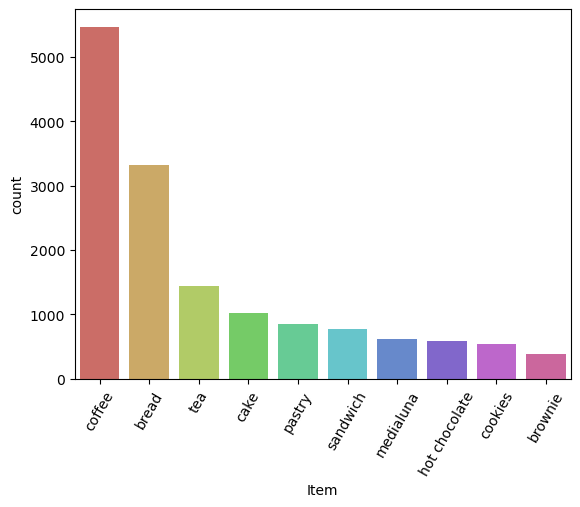

In [18]:
#Top 10 items
sns.barplot(data = df['Item'].value_counts().head(10), palette = 'hls')
plt.xticks(rotation = 60)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\1865670237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['month'], palette = 'Set2')


<AxesSubplot:xlabel='month', ylabel='count'>

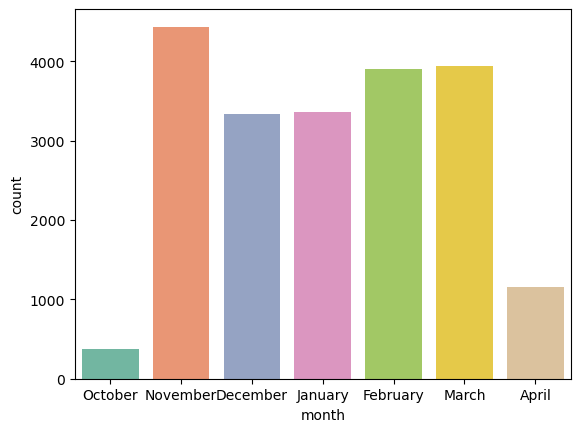

In [19]:
#Count of months
sns.countplot(x = df['month'], palette = 'Set2')

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\4293942353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['weekday'], palette = 'rocket')


<AxesSubplot:xlabel='weekday', ylabel='count'>

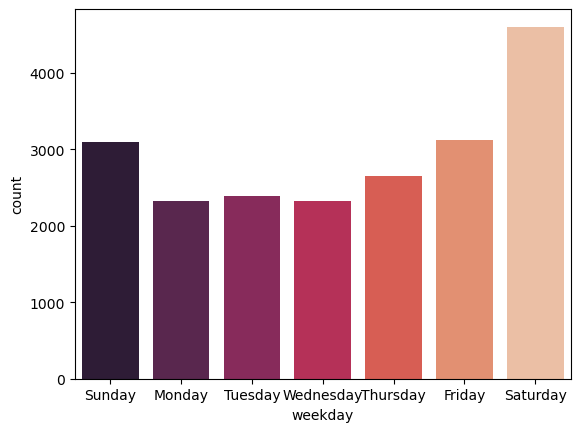

In [20]:
sns.countplot(x = df['weekday'], palette = 'rocket')

In [21]:
df1 = df.groupby(['Transaction', 'Item'])['Item'].count()
df1

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
                             ..
9682         tacos/fajita     1
             tea              1
9683         coffee           1
             pastry           1
9684         smoothies        1
Name: Item, Length: 18887, dtype: int64

In [22]:
dfg = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name = 'count')
dfg

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [30]:
df.groupby(['Transaction','Item'])['Item'].count()

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
                             ..
9682         tacos/fajita     1
             tea              1
9683         coffee           1
             pastry           1
9684         smoothies        1
Name: Item, Length: 18887, dtype: int64

In [27]:
df.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend',
       'date', 'month', 'hour', 'weekday'],
      dtype='object')

In [38]:
pivot = pd.pivot_table(data = dfg, index = 'Transaction', columns = 'Item', values = 'count', aggfunc = 'sum').fillna(0)

In [39]:
def countitems(x):
    if x>=1:
        return 1
    if x<=0:
        return 0

In [44]:
table = pivot.applymap(countitems)

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\3930059573.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table = pivot.applymap(countitems)


In [46]:
mba = apriori(table, min_support = 0.01, use_colnames = True)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [47]:
mba

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(coffee, bread, pastry)"


In [48]:
ascr = association_rules(mba, metric = 'lift', min_threshold = 1)

In [51]:
ascr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
